In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats


import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

feature_names = ['mean_x', 'mean_y', 'mean_z', 
                'rms_x', 'rms_y', 'rms_z']

target_names = ['Standing', 'Walking normal', 'Jumping', 
                'Jogging', 'Stairs up', 'Stairs down',
                'Fall front kness lying', 
                'Fall forward lying','Sideward lying']

def featuresFromBuffer(at):
    feat = np.zeros(27)
    x = np.array(at.iloc[:,0], dtype=np.float64) 
    y = np.array(at.iloc[:,1], dtype=np.float64)
    z = np.array(at.iloc[:,2], dtype=np.float64)
    
    means = [np.mean(i) for i in [x, y, z]]
    feat[0:3] = means
    
    rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
    feat[3:6] = rms
    

    return feat

In [2]:
# Import data

dt = pd.read_excel (r'F:\Program\OneDrive\KHOÁ LUẬN 2020\Exactly_Data.xlsx')
dt.columns
dt.shape

Index(['STD', 'Unnamed: 1', 'Unnamed: 2', 'WAL', 'Unnamed: 4', 'Unnamed: 5',
       'JUM', 'Unnamed: 7', 'Unnamed: 8', 'JOG', 'Unnamed: 10', 'Unnamed: 11',
       'STU', 'Unnamed: 13', 'Unnamed: 14', 'STN', 'Unnamed: 16',
       'Unnamed: 17', 'FKL', 'Unnamed: 19', 'Unnamed: 20', 'FOL',
       'Unnamed: 22', 'Unnamed: 23', 'SDL', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

(28939, 27)

In [3]:
#@param N : Filter order
#@param Wn : Cutoff frequency
def energyDistribution(action, number_samples, N, Wn):
    ans = 0
    ## Còn bên này thì action này là lại t
    for value in action:
        walk = dt[value]
        walk = walk.dropna()
        walk = walk.drop(0)
        walk.index = pd.RangeIndex(len(walk.index))

        # fAx after AVARAGE FILTER
        B, A = signal.butter(N, Wn, output='ba')
        smooth_data = signal.filtfilt(B,A, walk)
        x_filter = abs(walk[0:number_samples] - smooth_data[0:number_samples])
        ans += pow(x_filter,2)

    summ = 0
    for i in range (0, len(ans)):
        ans[i] = np.sqrt(ans[i])
        summ += ans[i]
    return summ

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

Text(0.5, 0, 'The State of Motion')

Text(0, 0.5, 'Energy distribution')

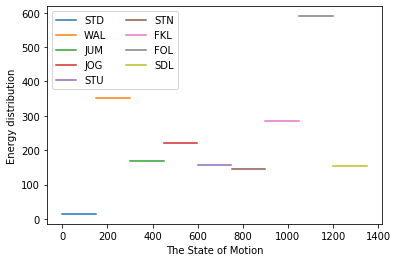

In [4]:
# Plot motions in different time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal


Standing = dt[['STD','Unnamed: 1', 'Unnamed: 2' ]]
Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']]
Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']]
Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']]
Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 


lst = [Standing, Walking_normal,Jumping,Jogging,Stairs_up,Stairs_down, Fall_front_knees_lying, Fall_forward_lying, Sideward_lying]

# Number of samples displayed per behavior
number_samples = 150
slot = 0

for act in lst:
    x_label_samples = []
    sum_arr = []
    slot += 1
    arr_slot = [i for i in  range((slot-1)*number_samples, slot*number_samples)]
    x_label_samples.extend(arr_slot)
    
    summ = energyDistribution(act, number_samples, 3, 0.1)

#     for value in act:
#         walk = dt[value]
#         walk = walk.dropna()
#         walk = walk.drop(0)
#         walk.index = pd.RangeIndex(len(walk.index))

#         # fAx after AVARAGE FILTER
#         N  = 3   # Filter order
#         Wn = 0.1 # Cutoff frequency
#         B, A = signal.butter(N, Wn, output='ba')
#         smooth_data = signal.filtfilt(B,A, walk)
#         x_filter = abs (walk[0:number_samples] - smooth_data[0:number_samples])
#         ans += pow(x_filter,2)

#     summ = 0
#     sum_arr = []
#     for i in range (0, len(ans)):
#         ans[i] = np.sqrt(ans[i])
#         summ += ans[i]
    

    for j in range(0,number_samples):
        sum_arr.append(summ)
        
    plt.plot(x_label_samples, sum_arr)
    plt.xlabel("The State of Motion")
    plt.ylabel("Energy distribution")
    plt.legend(['STD', 'WAL','JUM','JOG','STU','STN','FKL','FOL','SDL'],loc='best',ncol = 2)

    

In [58]:
# Caculate Pearson Correlation Coefficient 

from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
import pandas as pd

# calculate Pearson's correlation
# corr, _ = pearsonr(numpy.ndarray, numpy.ndarray)
# print('Pearsons correlation: %.3f' % corr) # return float

    #walk = dt[value]
#         walk = walk.dropna()
#         walk = walk.drop(0)
#         walk.index = pd.RangeIndex(len(walk.index))
Standing = dt[['STD','Unnamed: 1', 'Unnamed: 2' ]]
Walking_normal = dt[['WAL', 'Unnamed: 4', 'Unnamed: 5']]
Jumping = dt[['JUM', 'Unnamed: 7', 'Unnamed: 8']] 
Jogging = dt[['JOG', 'Unnamed: 10', 'Unnamed: 11']]
Stairs_up = dt[['STU', 'Unnamed: 13', 'Unnamed: 14']] 
Stairs_down = dt[['STN', 'Unnamed: 16', 'Unnamed: 17']] 
Fall_front_knees_lying = dt[['FKL', 'Unnamed: 19', 'Unnamed: 20']]
Fall_forward_lying = dt[['FOL', 'Unnamed: 22', 'Unnamed: 23']] 
Sideward_lying = dt[['SDL', 'Unnamed: 25', 'Unnamed: 26']] 
    
x_STD = dt['SDL']
x_STD = x_STD.dropna()
x_STD = x_STD.drop(0)
x_STD.index = pd.RangeIndex(len(x_STD.index))

y_STD = dt['Unnamed: 25']
y_STD = y_STD.dropna()
y_STD = y_STD.drop(0)
y_STD.index = pd.RangeIndex(len(y_STD.index)) #type pandas.Series

z_STD = dt['Unnamed: 26']
z_STD = z_STD.dropna()
z_STD = z_STD.drop(0)
z_STD.index = pd.RangeIndex(len(z_STD.index))
#x_array = pd.DataFrame.to_numpy(x_STD) #convert to array

cor_xy = pearsonr(x_STD, y_STD)
print( cor_xy)
cor_yz = pearsonr(y_STD, z_STD) # = pearsonr(z_STD, y_STD)
print(cor_yz)

cor_zx = pearsonr(z_STD, x_STD)
print( cor_zx)


(-0.5318801078099094, 8.986410508219742e-189)
(-0.2708681100188031, 1.0491160379613495e-44)
(0.2783990338684965, 3.1593849742905127e-47)
